Nama: Dicky Setiawan

NIM: 22/511229/NPA/19857

Kelas: KOMB


# **Tugas 1 - Pembelajaran Mesin**

*   Download dataset dari kaggle.com menggunakan API sesuai dengan langkah-langkah yang dijelaskan di slide (Dokumentasi API Kaggle https://www.kaggle.com/docs/api). Dataset yang di-download adalah dataset yang memiliki class atau target.
*   Analisis data menggunakan metode statistik dan visualisasi secara komprehensif. Analisis insight atau knowledge yang diperoleh dari hasil tersebut.
*   Buatlah kesimpulan berdasarkan analisis yang telah dilakukan, fitur mana yang berpengaruh signifikan terhadap variabel target dan jelaskan alasannya.
*   Tugas dikirimkan dalam Jupyter Notebook dengan penjelasan (bisa berupa file .ipynb atau link ke Google Colab). Pastikan file atau link dapat dibuka dan diakses secara publik.







**Link Google Colab**: https://colab.research.google.com/drive/1-OiLPZ8AuvJJy9PPmdoo9Y1F1kUrHlme?usp=sharing

##**Analisis Data Menggunakan Metode Statistik**

###Memuat Data

In [143]:
# Mengimpor library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# Menghubungkan Google Drive dan Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Mengambil dataset
dataset = '/content/gdrive/MyDrive/co2_emissions_kt_by_country.csv'
df = pd.read_csv(dataset)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [145]:
# Menampilkan isi dataset secara keseluruhan
df

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


In [146]:
# Menampilkan dataset pada negara Indonesia
indonesia_df = df[df['country_name'] == 'Indonesia']

# Mengurutkan index
indonesia_df = indonesia_df.reset_index(drop=True)

# Menampilkan dataset pada negara Indonesia
indonesia_df

,country_code,country_name,year,value
0,IDN,Indonesia,1960,21404.279000
1,IDN,Indonesia,1961,26024.699000
2,IDN,Indonesia,1962,22995.757000
3,IDN,Indonesia,1963,22783.071000
4,IDN,Indonesia,1964,22394.369000
5,IDN,Indonesia,1965,24689.911000
6,IDN,Indonesia,1966,23395.460000
7,IDN,Indonesia,1967,24561.566000
8,IDN,Indonesia,1968,27586.841000
9,IDN,Indonesia,1969,33391.702000


Dataset yang saya gunakan berasal dari Kaggle (https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country) mengenai jumlah emisi karbondioksida (CO2) (dalam kiloton(kt)) pada setiap negara di dunia yang terkumpul mulai dari tahun 1960-2019. Kumpulan data emisi CO2 ini mencakup semua negara di dunia dan disusun dari berbagai sumber, termasuk United Nations Framework Convention on Climate Change (UNFCCC) dan International Energy Agency (IEA).

###Menelaah Data

In [147]:
# Mengecek tipe-tipe data dari setiap kolom
df.dtypes

country_code     object
country_name     object
year              int64
value           float64
dtype: object

In [148]:
# Mengecek isi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [149]:
# Menampilkan statistik dasar setiap kolom data yang bertipe numerik pada seluruh dataset
df['value'].describe()

count    1.395300e+04
mean     8.254983e+05
std      2.788923e+06
min     -8.067400e+01
25%      1.100000e+03
50%      1.390000e+04
75%      1.642779e+05
max      3.434401e+07
Name: value, dtype: float64

In [150]:
# Menampilkan statistik dasar setiap kolom data yang bertipe numerik pada negara Indonesia
indonesia_df['value'].describe()

count        60.000000
mean     208985.416912
std      171471.268313
min       21404.279000
25%       53287.927250
50%      140346.173500
75%      341467.491150
max      619840.026855
Name: value, dtype: float64

### Fungsi Statistik

Menghitung rata-rata (median) dari data

In [151]:
# Menampilkan rata-rata jumlah emisi CO2 (dalam kiloton(kt)) dari semua negara di tahun 1960-2019
df['value'].mean()

825498.3433543197

In [152]:
# Menampilkan rata-rata jumlah emisi CO2 (dalam kiloton(kt)) dari negara Indonesia di tahun 1960-2019
indonesia_df['value'].mean()

208985.41691230473

Menghitung jumlah (sum) dari data

In [153]:
#Menampilkan jumlah keseluruhan emisi CO2 (dalam kiloton(kt)) dari semua negara di tahun 1960-2019
df['value'].sum()

11518178384.822823

In [154]:
#Menampilkan jumlah keseluruhan emisi CO2 (dalam kiloton(kt)) dari negara Indonesia di tahun 1960-2019
indonesia_df['value'].sum()

12539125.014738284

Mencari nilai tengah (median) dari data

In [155]:
#Menampilkan median dari jumlah emisi CO2 (dalam kiloton(kt)) dari semua negara di tahun 1960-2019
df['value'].median()

13900.0

In [156]:
#Menampilkan median dari jumlah emisi CO2 (dalam kiloton(kt)) dari negara Indonesia di tahun 1960-2019
indonesia_df['value'].median()

140346.1735

Menghitung varians dari data

In [157]:
#Menampilkan varians dari jumlah emisi CO2 (dalam kiloton(kt)) dari semua negara di tahun 1960-2019
df['value'].var()

7778092686215.466

In [158]:
#Menampilkan varians dari jumlah emisi CO2 (dalam kiloton(kt)) dari negara Indonesia di tahun 1960-2019
indonesia_df['value'].var()

29402395856.849766

Menghitung standar deviasi dari data

In [159]:
#Menampilkan standar deviasi dari jumlah emisi CO2 (dalam kiloton(kt)) dari semua negara di tahun 1960-2019
df['value'].std()

2788923.2126782313

In [160]:
#Menampilkan standar deviasi dari jumlah emisi CO2 (dalam kiloton(kt)) dari negara Indonesia di tahun 1960-2019
indonesia_df['value'].std()

171471.2683129444

### Mencari Pencilan (Outlier)

Mencari pencilan dengan 3-Sigma Rule

In [161]:
mean = df[['value']].mean()
stdev = df[['value']].std()
iso = (df[['value']] < mean - 3*stdev) | (df[['value']] > mean + 3*stdev)
df1 = df[['year', 'value']].assign(is_outlier=iso)
df1.loc[df1['is_outlier']]

,year,value,is_outlier
2151,2011,9.282550e+06,True
2152,2012,9.541870e+06,True
2153,2013,9.984570e+06,True
2154,2014,1.000667e+07,True
2155,2015,9.861100e+06,True
...,...,...,...
13647,2015,3.299554e+07,True
13648,2016,3.301856e+07,True
13649,2017,3.351454e+07,True
13650,2018,3.428935e+07,True


Mencari pencilan dengan Tukey's Fences

In [162]:
q1 = df['value'].quantile(0.25)
q3 = df['value'].quantile(0.75)
iqr = q3 - q1
iso = (df[['value']] < q1 - 1.5*iqr) | (df[['value']] > q3 + 1.5*iqr)
iseo = (df[['value']] < q1 - 3*iqr) | (df[['value']] > q3 + 3*iqr)
df1 = df[['year', 'value']].assign(is_outlier=iso, is_extreme_outlier=iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,year,value,is_outlier,is_extreme_outlier
100,2003,426379.996829,True,False
101,2004,457599.991269,True,False
102,2005,458459.994629,True,False
103,2006,465440.008163,True,False
104,2007,486179.996997,True,False
...,...,...,...,...
13836,2015,424809.997559,True,False
13837,2016,425140.014648,True,False
13838,2017,435649.993896,True,False
13839,2018,434350.006104,True,False


### Value Counts()

Value counts() untuk menampilkan frekuensi setiap nilai unik di dalam kolom, yang tertinggi count-nya merupakan modus pada kolom.

In [163]:
df['country_name'].value_counts()

St. Lucia                    60
Haiti                        60
Lao PDR                      60
Lebanon                      60
Liberia                      60
                             ..
West Bank and Gaza           27
Turks and Caicos Islands     27
Kosovo                        9
Curacao                       5
Sint Maarten (Dutch part)     3
Name: country_name, Length: 256, dtype: int64

Karena terdapat beberapa data yang bukan negara (kumpulan dari beberapa negara) dan/atau negara yang memiliki jumlah data tahun kurang dari 60 tahun (dari tahun 1960-2019), maka dihapus saja.

In [164]:
# Mendapatkan value counts dari kolom 'country_name'
counts = df['country_name'].value_counts()

# Memfilter data untuk mendapatkan negara yang memiliki jumlah data 'year' lebih dari 60
filtered_counts = counts[counts < 60]

# Membuat boolean mask berdasarkan filtered_counts
mask = df['country_name'].isin(filtered_counts.index)

# Menampilkan data yang telah difilter
df_filtered = df[mask]

In [165]:
df_filtered

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


### Analisis dengan Groupby

Mengelompokkan berdasarkan negara yang telah difilter, kemudian dihitung jumlah emisi CO2 (dalam kiloton(kt)) pada setiap negara

In [166]:
df_filtered.groupby('country_name')['value'].sum()

country_name
Andorra               1.463000e+04
Armenia               1.707600e+05
Aruba                 3.698096e+05
Azerbaijan            9.798300e+05
Belarus               1.852060e+06
                          ...     
Uzbekistan            3.472670e+06
Vanuatu               4.831815e+03
West Bank and Gaza    4.736664e+04
Zambia                1.887032e+05
Zimbabwe              6.252709e+05
Name: value, Length: 65, dtype: float64

Menampilkan urutan jumlah emisi CO2 dari setiap negara yang telah dikelompokkan mulai dari yang terbesar

In [167]:
df_filtered.groupby('country_name')[['value']].sum().sort_values(by="value", ascending=False)

,value
country_name,
Euro area,7.548864e+07
Germany,2.436702e+07
Ukraine,9.787780e+06
Turkiye,7.654740e+06
Kazakhstan,5.781750e+06
...,...
Marshall Islands,3.570000e+03
Turks and Caicos Islands,3.036276e+03
Sint Maarten (Dutch part),2.145195e+03


Menampilkan rata-rata jumlah emisi CO2 dari semua negara di dunia dari tahun 1960-2019

In [168]:
df_mean_by_year = df_filtered.groupby('year')['value'].mean()
df_mean_by_year

year
1960     2695.856167
1961     2614.288923
1962     2629.483467
1963     2541.918563
1964     2394.384318
1965     2487.059409
1966     2710.413045
1967     2977.604000
1968     3141.118864
1969     3474.649182
1970     3682.305739
1971     3799.623167
1972     3846.536320
1973     4243.745760
1974     4302.711120
1975     4502.929320
1976     5491.405840
1977     5416.452360
1978     5173.256920
1979     5160.789120
1980     5174.137000
1981     5353.379960
1982     5690.890640
1983     5793.566640
1984     6395.981400
1985     7026.998760
1986     7037.119680
1987     7751.597960
1988     7780.640600
1989     8319.102880
1990    91297.717066
1991    89792.681262
1992    85654.458115
1993    81866.516344
1994    78736.238148
1995    78845.785016
1996    79334.088295
1997    77999.352410
1998    78665.060016
1999    77213.256951
2000    78022.770836
2001    78844.908607
2002    79288.594322
2003    81450.546218
2004    81554.606218
2005    81251.277477
2006    82369.009631
2007    

### Korelasi Pearson Antara Kolom-kolom Numerik

In [169]:
df.loc[:,'year':].corr()

,year,value
year,1.000000,0.082068
value,0.082068,1.000000


## **Visualisasi Data & Insight**

### Pie Chart

Melihat Top 5 Country Penyumbang Jumlah Emisi CO2 Terbesar di Dunia

<Figure size 864x432 with 0 Axes>

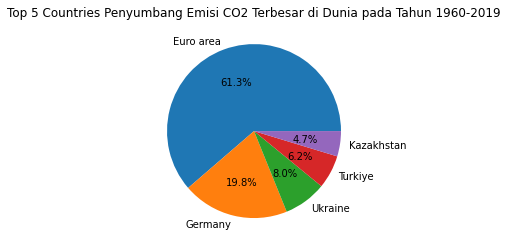

In [170]:
# Menampilkan top 5 country 
sums_by_country = df_filtered.groupby('country_name')['value'].sum()
sorted_sums = sums_by_country.sort_values(ascending=False)
top_5 = sorted_sums.head(5)

# Visualisasi
plt.figure(figsize=(12,6))
fig, ax = plt.subplots()
ax.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%')
ax.set_title('Top 5 Countries Penyumbang Emisi CO2 Terbesar di Dunia pada Tahun 1960-2019')
plt.show()

Dari hasil visualisasi di atas, dapat dilihat bahwa Uni Eropa (Euro Area) yang merupakan kumpulan dari negara-negara di benua Eropa tentunya memiliki jumlah buangan emisi CO2 terbesar. Dilanjut dengan Germany di posisi kedua dan seterusnya ada Kazakhstan di posisi kelima.

### Bar Chart

#### Melihat Top Country Penyumbang Jumlah Emisi CO2 Terbesar di Dunia

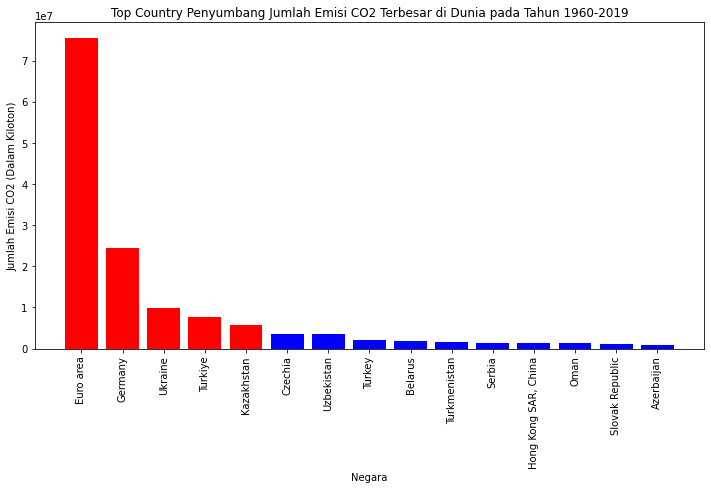

In [171]:
# Menampilkan top 15 country
sums_by_country = df_filtered.groupby('country_name')['value'].sum()
sorted_sums = sums_by_country.sort_values(ascending=False)
top_15 = sorted_sums.head(15)

# Visualisasi
x_coords = np.arange(len(top_15))
colors = ['#0000FF' for _ in range(len(top_15))]
highlight_colors = ['#FF0000' if i in top_15.head().index else '#0000FF' for i in top_15.index]
plt.figure(figsize=(12,6))
plt.bar(x_coords, top_15, tick_label=top_15.index, color=highlight_colors)
plt.xticks(rotation=90) #memutar labels x-axis 
plt.xlabel('Negara')
plt.ylabel('Jumlah Emisi CO2 (Dalam Kiloton)')
plt.title('Top Country Penyumbang Jumlah Emisi CO2 Terbesar di Dunia pada Tahun 1960-2019')
plt.show()

Dari hasil visualisasi di atas menampilkan 15 negara penyumbang emisi CO2 terbesar mulai dari tahun 1960-2019. Dapat dilihat juga 5 besar negara mulai dari Uni Eropa (Euro Area) hingga Kazakhstan di posisi kelima.

#### Tren Peningkatan Jumlah Emisi CO2 di Indonesia dari Tahun ke Tahun

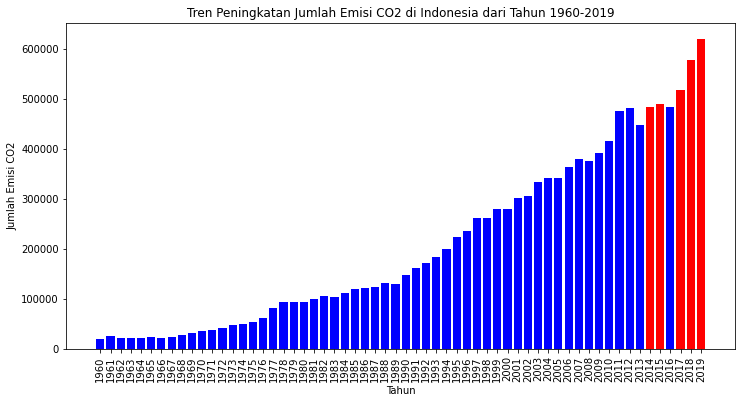

In [172]:
# Menghighlight top 5 year dengan jumlah emisi CO2 terbesar di Indonesia
sorted = indonesia_df['value'].sort_values(ascending=False)
top_5_year_indo = sorted.head(5)

# Visualisasi
x_coords = np.arange(len(indonesia_df['country_name']))
plt.figure(figsize=(12,6))
colors = ['#0000FF' for _ in range(len(indonesia_df))]
for i in top_5_year_indo.index:
    colors[i] = '#FF0000'
plt.title('Tren Peningkatan Jumlah Emisi CO2 di Indonesia dari Tahun 1960-2019')
plt.ylabel('Jumlah Emisi CO2')
plt.xlabel('Tahun')
plt.bar(x_coords, indonesia_df['value'], tick_label=indonesia_df['year'], color=colors)
plt.xticks(rotation=90) #memutar labels x-axis 
plt.show()

Tampak bahwa di Indonesia sendiri selalu terjadi peningkatan dari tahun ke tahun. Namun tidak jarang juga terdapat penurunan walaupun tidak signifikan. Secara keseluruhan di Indonesia sendiri selalu memiliki tren yang naik dalam kurun waktu 1960 hingga 2019. Selisih jumlah emisi CO2 antara tahun 2019 dan 1960 sangat besar sekali sehingga menunjukkan bahwa emisi CO2 di Indonesia sudah tidak terkontrol lagi.


Pada tahun 2014, 2015, 2017, 2018, 2019 merupakan tahun dimana Indonesia mencatatkan angka yang paling tinggi pada jumlah emisi CO2 sejak sekitar 60 tahun terakhir.

#### Perbandingan antara jumlah emisi CO2 di Indonesia dan rata-rata emisi CO2 dari semua negara pada tahun 1960-2019

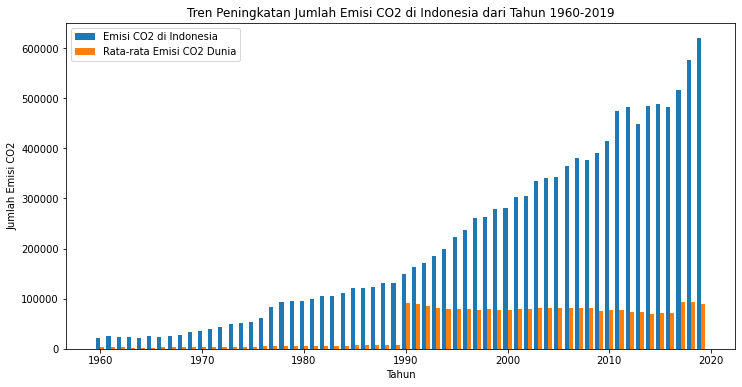

In [173]:
plt.figure(figsize=(12,6))
# Data
x = indonesia_df['year']
y1 = indonesia_df['value']
y2 = df_mean_by_year

# Plot data dan tambahkan label
bar_width = 0.4
plt.bar(x - bar_width/2, y1, width=bar_width, label='Emisi CO2 di Indonesia')
plt.bar(x + bar_width/2, y2, width=bar_width, label='Rata-rata Emisi CO2 Dunia')

# Atur judul, label sumbu, dan legend
plt.title('Tren Peningkatan Jumlah Emisi CO2 di Indonesia dari Tahun 1960-2019')
plt.ylabel('Jumlah Emisi CO2')
plt.xlabel('Tahun')
plt.legend()

# Tampilkan grafik
plt.show()

Jumlah emisi CO2 di Indonesia tampak memiliki angka yang jauh lebih tinggi dan signifikan dibandingkan dengan rata-rata emisi CO2 dari seluruh negara di dunia yang mana tampak jelas pada rentang sekitar tahun 1990 hingga 2019. 

### Line Chart

#### Tren Peningkatan Jumlah Emisi CO2 di Indonesia dari Tahun ke Tahun

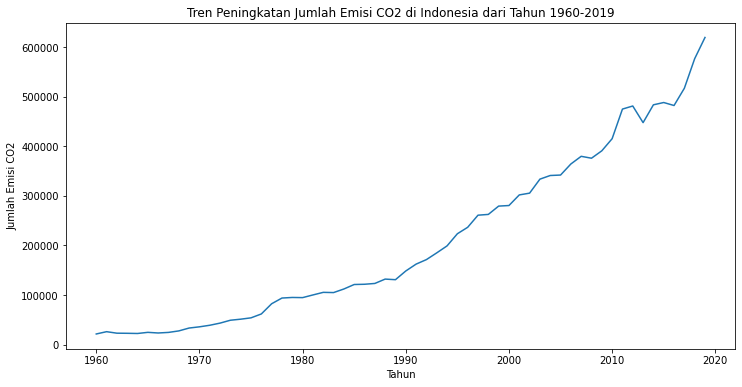

In [174]:
plt.figure(figsize=(12,6))
plt.plot(indonesia_df['year'], indonesia_df['value'])
plt.title('Tren Peningkatan Jumlah Emisi CO2 di Indonesia dari Tahun 1960-2019')
plt.ylabel('Jumlah Emisi CO2')
plt.xlabel('Tahun')
plt.show()

Tampak bahwa di Indonesia sendiri selalu terjadi peningkatan dari tahun ke tahun. Namun tidak jarang juga terdapat penurunan walaupun tidak signifikan. Secara keseluruhan di Indonesia sendiri selalu memiliki tren yang naik dalam kurun waktu 1960 hingga 2019. Selisih jumlah emisi CO2 antara tahun 2019 dan 1960 sangat besar sekali sehingga menunjukkan bahwa emisi CO2 di Indonesia sudah tidak terkontrol lagi.

#### Korelasi antara jumlah emisi CO2 di Indonesia dan rata-rata emisi CO2 dari semua negara pada tahun 1960-2019

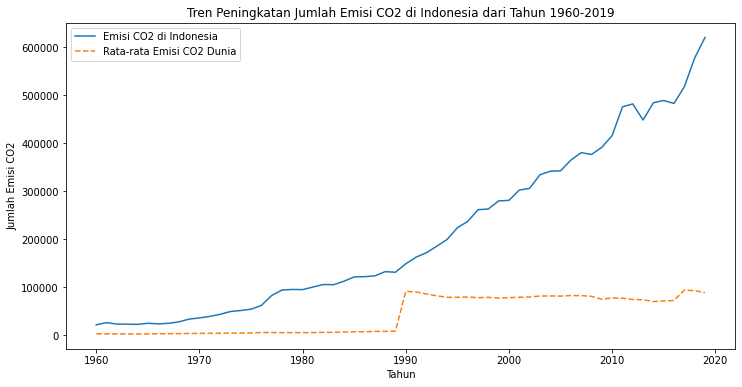

In [175]:
plt.figure(figsize=(12,6))
# Data
x = indonesia_df['year']
y1 = indonesia_df['value']
y2 = df_mean_by_year

# Plot data dan tambahkan label
plt.plot(x, y1, label='Emisi CO2 di Indonesia')
plt.plot(x, y2, linestyle='--', label='Rata-rata Emisi CO2 Dunia')

# Atur judul, label sumbu, dan legend
plt.title('Tren Peningkatan Jumlah Emisi CO2 di Indonesia dari Tahun 1960-2019')
plt.ylabel('Jumlah Emisi CO2')
plt.xlabel('Tahun')
plt.legend()

# Tampilkan grafik
plt.show()

Jumlah emisi CO2 di Indonesia tampak memiliki angka yang jauh lebih tinggi dan signifikan dibandingkan dengan rata-rata emisi CO2 dari seluruh negara di dunia yang mana tampak jelas pada rentang sekitar tahun 1990 hingga 2019. 

## **Kesimpulan**

Berdasarkan dari hasil analisis dan visualisasi yang telah saya lakukan, dapat disimpulkan bahwa mulai dari tahun 1960-2019 di seluruh negara di dunia dan tidak terlepas Indonesia, selalu memiliki tren naik dalam hal jumlah emisi karbondioksida (CO2) dalam kiloton (kt) yang dihasilkan dalam periode tahunan. 


Peningkatan emisi karbondioksida (CO2) dari tahun 1960 hingga 2019 disebabkan oleh sejumlah faktor, di antaranya pertumbuhan populasi dari yang sekitar 3 miliar pada tahun 1960 menjadi lebih dari 7 miliar pada tahun 2019. Seiring dengan pertumbuhan populasi, ekonomi global juga tumbuh pesat, pembangunan ekonomi memerlukan energi yang lebih banyak, terutama dari bahan bakar fosil yang menghasilkan emisi CO2. Urbanisasi yang menyebabkan peningkatan permintaan akan energi dan transportasi. Pembangunan kota juga dapat menyebabkan deforestasi dan penggunaan lahan yang lebih besar, yang semuanya dapat menyebabkan emisi CO2. Transportasi, termasuk mobil, pesawat, dan kapal, telah berkembang pesat sejak tahun 1960. Penyediaan transportasi yang lebih banyak dan murah telah memungkinkan mobilitas yang lebih tinggi, tetapi juga menyebabkan peningkatan emisi CO2. Kemudian sejak tahun 1960, kebutuhan akan listrik telah meningkat dengan pesat, terutama di negara-negara yang sedang berkembang. 

Tren ini tentunya akan terus berlanjut ke depan karena pertumbuhan populasi dan ekonomi yang terus berlanjut dan cara yang mungkin bisa menekan adanya jumlah emisi karbondioksida (CO2) ini tentunya adalah dengan beralih ke energi yang ramah lingkungan dan tetap menjaga kelestarian alam sekitar kita.



